0. feature별 영향력 확인 하기
1. 테스트 사이즈 0.1 로 다중회귀 하기 
2. liner Regression , vs Decsion Tree Regression
3. Model 성능 평가 MSE 구하기
   -> 구글링해보기 


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
diabetes=  load_diabetes()

In [3]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
features = df.columns[:-1]
print(features)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


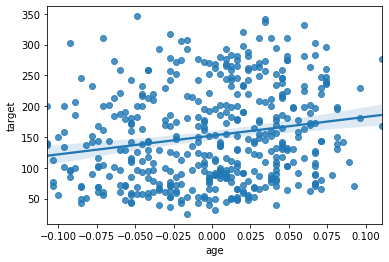

In [5]:
sns.regplot(x='age', y='target', data=df)
plt.show()

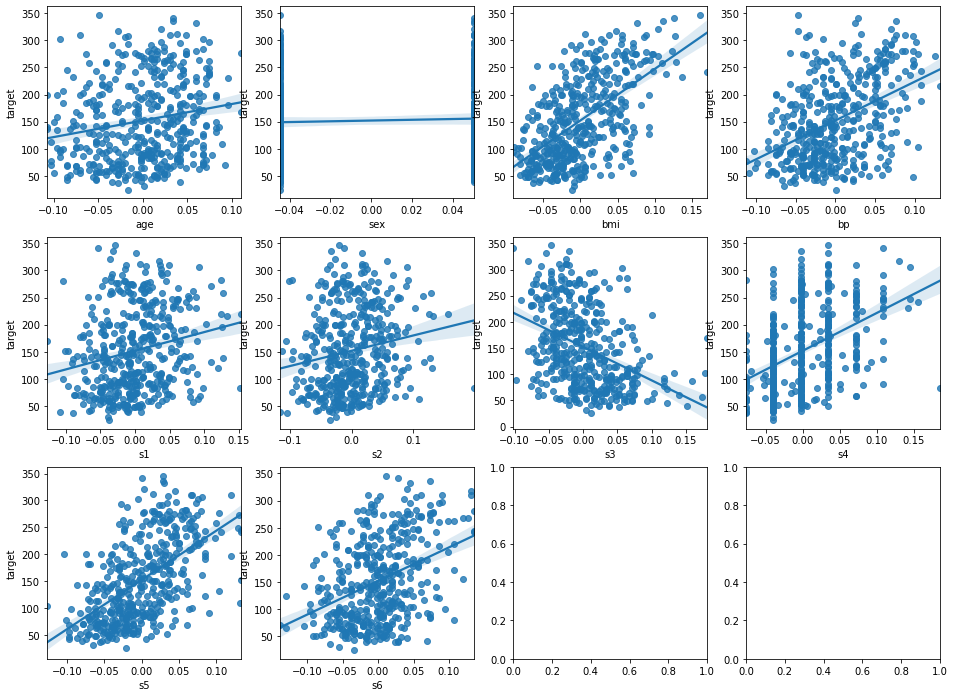

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

In [7]:
from sklearn.linear_model import LinearRegression

0. feature별 영향력 확인 하기
   - > for 문을 이용한 score 확인하기 
   bmi 지수가 가장큰 영향을 줌

In [8]:
y = diabetes.target
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [9]:
X = diabetes.data
y = diabetes.target
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [10]:
lr.coef_,lr.intercept_

(array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
        -792.18416163,  476.74583782,  101.04457032,  177.06417623,
         751.27932109,   67.62538639]),
 152.1334841628965)

In [11]:
np.dot(lr.coef_, diabetes.data[0]) + lr.intercept_

206.11706978709228

In [12]:
diabetes.target[0]

151.0

In [13]:
for i in range(5):
    pred1 = np.dot(lr.coef_, diabetes.data[i]) + lr.intercept_
    print(f'예측값: {pred1:.2f}, 실제값: {diabetes.target[i]}')

예측값: 206.12, 실제값: 151.0
예측값: 68.07, 실제값: 75.0
예측값: 176.88, 실제값: 141.0
예측값: 166.92, 실제값: 206.0
예측값: 128.46, 실제값: 135.0


In [14]:
lr.predict(diabetes.data[:5])

array([206.11706979,  68.07234761, 176.88406035, 166.91796559,
       128.45984241])

In [15]:
lr.predict(diabetes.data[0:1]), lr.predict(diabetes.data[0].reshape(1,-1))

(array([206.11706979]), array([206.11706979]))

# DecisionTreeRegressor사용하기 

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
# data_train = df[df['target'] >= 0]


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=2021
)

In [31]:
dtr2 = DecisionTreeRegressor()

In [30]:
dtr2.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
pred2 = dtr2.predict(diabetes.data)

In [22]:
from sklearn.metrics import r2_score
r2_score(diabetes.target, pred2)

0.8791633355842107

# model 성능 

In [28]:
lr.score(X, y), dtr2.score(X, y)

(0.5177494254132934, 0.8791633355842107)

# MSE 구하기 (DecsionTreeRegressor)

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(diabetes.target, pred2)
rmse = np.sqrt(mse)                         # Root mean squared error
mse, rmse

(716.5475113122172, 26.76840509466743)